In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [22]:
# Load the data
fashion_mnist = tf.keras.datasets.fashion_mnist

In [23]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255 , x_test / 255 # Normalizing / Scaling the data between 0-1
print(f"X train shape is: {x_train.shape}")

X train shape is: (60000, 28, 28)


In [24]:
# Since the data is Image so it is only 2D!
# Convolution expects the data to be in (height, width, color channel)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [32]:
# Number of classes
"""
set() method is used to convert any of the iterable, 
to the distinct element and sorted sequence of iterable elements
- set is a data structure that contains unique elements
"""
print(set(y_train))
k = len(set(y_train))
print(f"Number of classes: {k}")

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Number of classes: 10


In [68]:
# Label Mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle Boot'''.split('\n')
labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

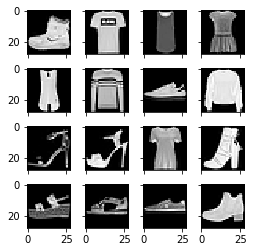

In [30]:
"""
-There are 60k samples of FashionMnist.
-This data has the dimension of: (60000, 28, 28)
-First we add the extra dimension which is for a
color channel(3 for RGB and 1 for grayscale)
- The input size of a single image is: (28, 28, 1)
"""
from mpl_toolkits.axes_grid1 import ImageGrid

imgs = []
# Append to imgs, the first 16 images from the x_train
for i in range(16):
    imgs.append(x_train[i].reshape(28, 28))
fig = plt.figure(figsize=(4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4,4),  # creates (n,n) grid of axes
                 axes_pad=0.2,  # pad between axes in inch.
                 )

for ax, im in zip(grid, imgs):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")
plt.show()

# Build the model

In [33]:
# using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(filters=32, kernel_size=(3,3), strides=2, activation='relu')(i)
x = Conv2D(filters=64, kernel_size=(3, 3), strides=2, activation='relu')(x)
x = Conv2D(filters=128, kernel_size=(3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation='softmax')(x)

model = Model(i, x)

In [34]:
# Compile
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])


In [35]:
# Fit
results = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 34s 565us/sample - loss: 0.5217 - accuracy: 0.8069 - val_loss: 0.3963 - val_accuracy: 0.8537
Epoch 2/15
60000/60000 [==============================] - 32s 531us/sample - loss: 0.3608 - accuracy: 0.8641 - val_loss: 0.3340 - val_accuracy: 0.8749
Epoch 3/15
60000/60000 [==============================] - 24s 407us/sample - loss: 0.3118 - accuracy: 0.8822 - val_loss: 0.3271 - val_accuracy: 0.8754
Epoch 4/15
60000/60000 [==============================] - 29s 481us/sample - loss: 0.2802 - accuracy: 0.8952 - val_loss: 0.3069 - val_accuracy: 0.8868
Epoch 5/15
60000/60000 [==============================] - 32s 526us/sample - loss: 0.2521 - accuracy: 0.9041 - val_loss: 0.3166 - val_accuracy: 0.8876
Epoch 6/15
60000/60000 [==============================] - 32s 526us/sample - loss: 0.2328 - accuracy: 0.9123 - val_loss: 0.3114 - val_accuracy: 0.8913
Epoch 7/15
60000/60000 [====================

# Plot the Graph

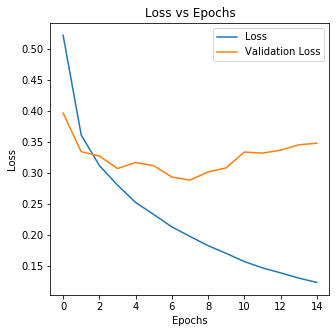

In [40]:
# Loss vs Epochs
plt.rcParams['figure.figsize'] = [5, 5] # make the plot bigger
plt.plot(results.history['loss'], label='Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.title("Loss vs Epochs")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

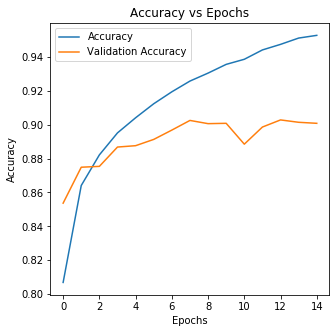

In [41]:
# Accuracy vs Epochs
plt.plot(results.history['accuracy'], label='Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy vs Epochs")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

Confusion matrix without Normalization
[[811   1  23  21   1   1 135   0   6   1]
 [  0 974   2  14   4   0   3   0   3   0]
 [ 13   1 839  11  54   0  82   0   0   0]
 [  8   2  15 921  23   1  29   0   1   0]
 [  0   0  57  25 834   0  83   0   1   0]
 [  0   0   0   0   0 976   0  15   0   9]
 [ 91   0  56  23  68   0 754   0   8   0]
 [  0   0   0   0   0  11   0 958   0  31]
 [  0   1   5   3   4   1   9   2 973   2]
 [  1   0   0   0   0   4   0  27   0 968]]


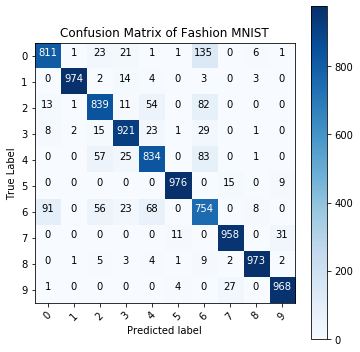

In [42]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title="Confusion Matrix of Fashion MNIST",
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix without Normalization")
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted label")
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

<strong> numpy.random.choice() </strong> function returns "k" random element from the non empty sequence. As k(size)is given to the fuction as argument which signifies the number of random element to choose.

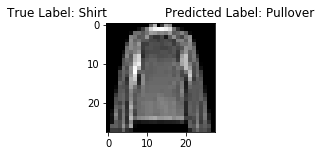

In [97]:
# Show some misclassified examples
plt.rcParams['figure.figsize'] = [2,2]
misclassified = np.where(p_test != y_test )[0]
i =  np.random.choice(misclassified)
plt.imshow(x_test[i].reshape(28,28), cmap="gray")
plt.title(f"True Label: {labels[int(y_test[i])]} \
              Predicted Label: {labels[int(p_test[i])]}")
plt.show()

In [98]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.347723877671361, 0.9008]